In [3]:
import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import seaborn as sns
import scipy.stats as st

Este cuaderno está dedicado a juntar todas las predicciones y validar la eficacia de nuestro sistema final 

In [5]:
wearableMaternal = pd.read_csv('wearable-maternal-risk-predictions.csv')
wearableGDM = pd.read_csv("wearable-gdm-predictions.csv")
wearablePreeclam = pd.read_csv("wearable_with_predictions.csv")

encountMaternal = pd.read_csv('encounter-maternal-risk-predictions.csv')
encountGDM = pd.read_csv("encounter-gdm-predictions.csv")
encountPreeclam = pd.read_csv("encounter_with_predictions.csv")


In [7]:
wearableMaternal.head()

,user_id,Age,timestamp,DiastolicBP,SystolicBP,BS,BodyTemp,HeartRate,day,month&year,date,week,trimester,Predicted_Risk
0,user_0000,32,2024-06-16 02:45:05,89.0,134.0,8.26,98.696800,100.0,2024-06-16,2024-06,2024-06-16,3,First,2
1,user_0000,32,2024-06-16 10:45:05,87.0,130.0,8.33,98.711909,108.0,2024-06-16,2024-06,2024-06-16,3,First,2
2,user_0000,32,2024-06-16 18:45:05,87.0,130.0,8.33,98.711909,108.0,2024-06-16,2024-06,2024-06-16,3,First,2
3,user_0000,31,2024-06-18 07:37:54,87.0,133.0,8.86,98.843603,121.0,2024-06-18,2024-06,2024-06-18,3,First,2
4,user_0000,31,2024-06-18 15:37:54,86.0,131.0,7.99,98.870108,102.0,2024-06-18,2024-06,2024-06-18,3,First,2


In [9]:
wearableGDM

,Age,BMI,Sys BP,Dia BP,OGTT,Predicted Target
0,32,29.1,134.000000,89.000000,148.680000,0
1,32,29.1,130.000000,87.000000,149.940000,0
2,32,29.1,130.000000,87.000000,149.940000,0
3,31,29.1,133.000000,87.000000,159.480000,1
4,31,29.1,131.000000,86.000000,143.820000,0
...,...,...,...,...,...,...
4021,32,29.9,112.185515,67.324404,133.719263,0
4022,32,29.9,112.185515,67.324404,133.719263,0
4023,32,29.9,122.502401,78.752401,94.199750,0
4024,32,29.9,122.502286,78.752515,94.199750,0


In [11]:
wearablePreeclam 

,user_id,Age,timestamp,Diastolic BP,Systolic BP,BS,BodyTemp,HeartRate,day,month&year,date,week,trimester,BMI,diabetes,Predicted_Class
0,user_0000,0.329675,2024-06-16 02:45:05,1.338706,1.435813,8.260000,98.696800,100.0,2024-06-16,2024-06,2024-06-16,3,First,0.854897,0,0
1,user_0000,0.329675,2024-06-16 02:45:05,1.338706,1.435813,8.260000,98.696800,100.0,2024-06-16,2024-06,2024-06-16,3,First,0.854897,0,0
2,user_0000,0.329675,2024-06-16 02:45:05,1.338706,1.435813,8.260000,98.696800,100.0,2024-06-16,2024-06,2024-06-16,3,First,0.854897,0,0
3,user_0000,0.329675,2024-06-16 02:45:05,1.338706,1.435813,8.260000,98.696800,100.0,2024-06-16,2024-06,2024-06-16,3,First,0.854897,0,0
4,user_0000,0.329675,2024-06-16 02:45:05,1.338706,1.435813,8.260000,98.696800,100.0,2024-06-16,2024-06,2024-06-16,3,First,0.854897,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276615,user_0099,0.329675,2025-06-29 17:20:22,0.260384,0.199871,5.233319,98.567862,124.0,2025-06-29,2025-06,2025-06-29,30,Third,1.048158,1,2
276616,user_0099,0.329675,2025-06-29 17:20:22,0.260384,0.199871,5.233319,98.567862,124.0,2025-06-29,2025-06,2025-06-29,30,Third,1.048158,1,2
276617,user_0099,0.329675,2025-06-29 17:20:22,0.260384,0.199871,5.233319,98.567862,124.0,2025-06-29,2025-06,2025-06-29,30,Third,1.048158,1,2
276618,user_0099,0.329675,2025-06-29 17:20:22,0.260384,0.199871,5.233319,98.567862,124.0,2025-06-29,2025-06,2025-06-29,30,Third,1.048158,1,2


In [13]:
encountMaternal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8363 entries, 0 to 8362
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             8363 non-null   int64  
 1   SystolicBP      8363 non-null   float64
 2   DiastolicBP     8363 non-null   float64
 3   BS              8363 non-null   float64
 4   HeartRate       8363 non-null   float64
 5   day             8363 non-null   object 
 6   visit_number    8363 non-null   int64  
 7   user_id         8363 non-null   object 
 8   BodyTemp        4233 non-null   float64
 9   Predicted_Risk  8363 non-null   int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 653.5+ KB


In [15]:
encountGDM

,Age,BMI,Sys BP,Dia BP,OGTT,Predicted Target
0,32,23.5,90.0,72.0,4.93395,1
1,32,23.5,90.0,72.0,4.93395,1
2,32,23.5,90.0,72.0,4.93395,1
3,32,23.5,90.0,72.0,4.93395,1
4,32,23.5,90.0,72.0,4.93395,1
...,...,...,...,...,...,...
8249,32,25.3,111.0,73.0,5.03385,0
8250,32,25.3,111.0,73.0,5.03385,0
8251,32,25.3,111.0,73.0,5.03385,0
8252,32,25.3,111.0,73.0,5.03385,0


In [17]:
encountPreeclam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8254 entries, 0 to 8253
Data columns (total 29 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Unnamed: 0                                          8254 non-null   int64  
 1   user_id                                             8254 non-null   object 
 2   UNITS                                               8254 non-null   object 
 3   DATE                                                8254 non-null   object 
 4   BIRTHDATE                                           8254 non-null   object 
 5   GENDER                                              8254 non-null   object 
 6   RACE                                                8254 non-null   object 
 7   ETHNICITY                                           8254 non-null   object 
 8   Age                                                 8254 non-null   float64
 9

In [19]:
auxEncountPreeclam = encountPreeclam[['Age', 'diabetes', 'BMI', 'Diastolic BP', 'Systolic BP', 'BS', 'HeartRate', 'Predicted_Class']]

# VISUALIZACIÓN DE RIESGO PROMEDIO DE CADA USUARIO

Vamos a asignar una columna de 'user_id' en los dataframes de clasificación de riesgo de GDM. 

In [21]:
wearableGDM['user_id'] = range(1, len(wearableGDM) + 1)
encountGDM['user_id'] = range(1, len(encountGDM) + 1)

## Unificamos riesgo por usuario

### AVG OF GDM RISK PER USER

In [23]:
gdmAvg = pd.merge(wearableGDM[['user_id', 'Predicted Target']], encountGDM[['user_id', 'Predicted Target']], on='user_id', suffixes=('_wearable', '_encounter'))
gdmAvg.head()

,user_id,Predicted Target_wearable,Predicted Target_encounter
0,1,0,1
1,2,0,1
2,3,0,1
3,4,1,1
4,5,0,1


In [25]:
gdmAvg['GDM_Risk'] = gdmAvg[['Predicted Target_wearable', 'Predicted Target_encounter']].mean(axis=1)

In [27]:
gdmAvg

,user_id,Predicted Target_wearable,Predicted Target_encounter,GDM_Risk
0,1,0,1,0.5
1,2,0,1,0.5
2,3,0,1,0.5
3,4,1,1,1.0
4,5,0,1,0.5
...,...,...,...,...
4021,4022,0,0,0.0
4022,4023,0,0,0.0
4023,4024,0,0,0.0
4024,4025,0,0,0.0


### AVG OF PREECLAMPSIA RISK  PER USER

In [29]:
preeclampsia_avg = pd.merge(wearablePreeclam [['user_id', 'Predicted_Class']], 
                            encountPreeclam[['wearable_user_id', 'Predicted_Class']], 
                            left_on='user_id', right_on='wearable_user_id', suffixes=('_wearable', '_encounter'))

In [31]:
preeclampsia_avg['Preeclampsia_Risk'] = preeclampsia_avg[['Predicted_Class_wearable', 'Predicted_Class_encounter']].mean(axis=1)

In [32]:
preeclampsia_avg

,user_id,Predicted_Class_wearable,wearable_user_id,Predicted_Class_encounter,Preeclampsia_Risk
0,user_0000,0,user_0000,2,1.0
1,user_0000,0,user_0000,2,1.0
2,user_0000,0,user_0000,2,1.0
3,user_0000,0,user_0000,2,1.0
4,user_0000,0,user_0000,2,1.0
...,...,...,...,...,...
171065383,user_0099,2,user_0099,2,2.0
171065384,user_0099,2,user_0099,2,2.0
171065385,user_0099,2,user_0099,2,2.0
171065386,user_0099,2,user_0099,2,2.0


## AVG MATERNAL RISK PER USER

In [34]:
# Extraer valores únicos de user_id de ambos datasets
encounter_ids = encountMaternal['user_id'].unique()
wearable_ids = wearableMaternal['user_id'].unique()

# Crear un mapeo manual si conoces la correspondencia
# Aquí asignamos wearable_ids en orden a encounter_ids
user_mapping = dict(zip(encounter_ids, wearable_ids))

# Mapear los IDs en encounter_maternal
encountMaternal['wearable_user_id'] = encountMaternal['user_id'].map(user_mapping)
print(encountMaternal[['user_id', 'wearable_user_id']].head())

                                user_id wearable_user_id
0  006a3718-02e0-4eee-deb2-27735709da2d        user_0000
1  006a3718-02e0-4eee-deb2-27735709da2d        user_0000
2  006a3718-02e0-4eee-deb2-27735709da2d        user_0000
3  006a3718-02e0-4eee-deb2-27735709da2d        user_0000
4  006a3718-02e0-4eee-deb2-27735709da2d        user_0000


In [35]:
maternal_avg = pd.merge(wearableMaternal [['user_id', 'Predicted_Risk']], 
                            encountMaternal[['wearable_user_id', 'Predicted_Risk']], 
                            left_on='user_id', right_on='wearable_user_id', suffixes=('_wearable', '_encounter'))

In [36]:
maternal_avg['Maternal_Risk'] = maternal_avg[['Predicted_Risk_wearable', 'Predicted_Risk_encounter']].mean(axis=1)

In [37]:
maternal_avg

,user_id,Predicted_Risk_wearable,wearable_user_id,Predicted_Risk_encounter,Maternal_Risk
0,user_0000,2,user_0000,0,1.0
1,user_0000,2,user_0000,0,1.0
2,user_0000,2,user_0000,0,1.0
3,user_0000,2,user_0000,0,1.0
4,user_0000,2,user_0000,0,1.0
...,...,...,...,...,...
404191,user_0099,0,user_0099,0,0.0
404192,user_0099,0,user_0099,0,0.0
404193,user_0099,0,user_0099,0,0.0
404194,user_0099,0,user_0099,0,0.0


## VISTA EN GRÁFICAS

C:\Users\virginia.anton\AppData\Local\Temp\ipykernel_27396\2130114633.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(maternal_avg['Maternal_Risk'], label='Maternal Risk', color = 'blue', shade=True)
C:\Users\virginia.anton\AppData\Local\Temp\ipykernel_27396\2130114633.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(preeclampsia_avg['Preeclampsia_Risk'], label='Preeclampsia Risk', color ='orange', shade=True)
C:\Users\virginia.anton\AppData\Local\Temp\ipykernel_27396\2130114633.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gdmAvg['GDM_Risk'], label='GDM Risk', color = 'red', shade=True)


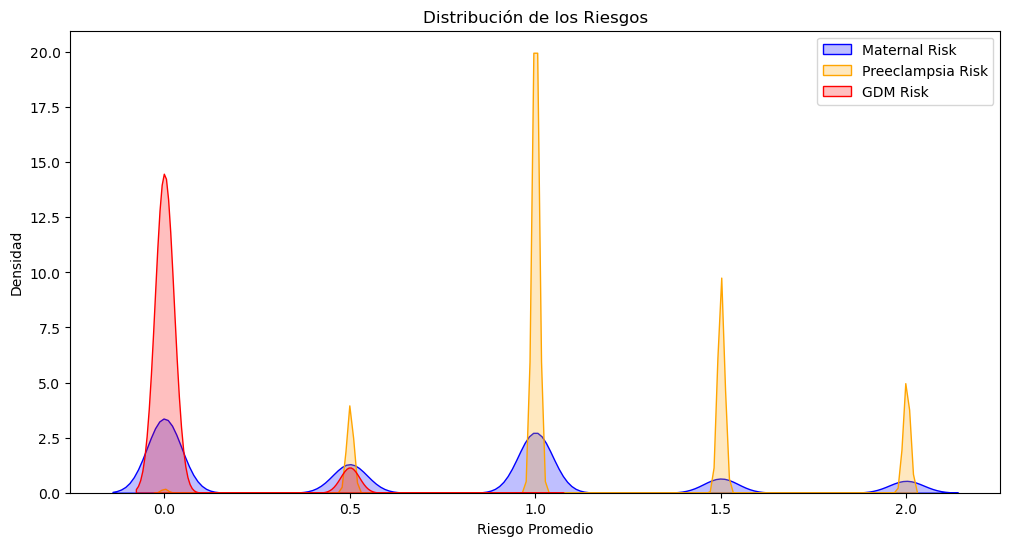

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar distribuciones
plt.figure(figsize=(12, 6))
sns.kdeplot(maternal_avg['Maternal_Risk'], label='Maternal Risk', color = 'blue', shade=True)
sns.kdeplot(preeclampsia_avg['Preeclampsia_Risk'], label='Preeclampsia Risk', color ='orange', shade=True)
sns.kdeplot(gdmAvg['GDM_Risk'], label='GDM Risk', color = 'red', shade=True)

plt.title('Distribución de los Riesgos')
plt.xlabel('Riesgo Promedio')
plt.ylabel('Densidad')
plt.legend()
plt.show()

In [292]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def cluster_data(dataset, n_clusters, cols_to_drop):
    scaler = StandardScaler()
    if cols_to_drop is not None:
        dataset = dataset.drop(columns=cols_to_drop).dropna()
    scaled_features = scaler.fit_transform(dataset)

#aplicamos K Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    dataset['Cluster'] = kmeans.fit_predict(scaled_features)
    return dataset
    
    

In [294]:
#Realizamos clustering por separado

colsDropMatWS = ['user_id', 'timestamp', 'month&year', 'day', "date", "trimester"]
colsDropMatEnc = ['wearable_user_id', 'day','visit_number', "user_id"]

wearableMaternal = cluster_data(wearableMaternal, 3, colsDropMatWS)
encountMaternal = cluster_data(encountMaternal, 3, colsDropMatEnc)

wearableGDM = cluster_data(wearableMaternal, 3, None)
encountGDM = cluster_data(encountGDM, 3, None)

wearablePreeclam = cluster_data(wearablePreeclam, 3, colsDropMatWS)
auxEncountPreeclam  = cluster_data(auxEncountPreeclam ,3 , None)

In [296]:
# Crear un dataframe resumen de clusters
summary_clusters = pd.DataFrame({
    'Wearable_Maternal': wearableMaternal['Cluster'],
    'Wearable_GDM': wearableGDM['Cluster'],
    'Wearable_Preeclampsia': wearablePreeclam['Cluster'],
    'Encounter_Maternal': encountMaternal['Cluster'],
    'Encounter_GDM': encountGDM['Cluster'],
    'Encounter_Preeclampsia': auxEncountPreeclam ['Cluster'],
})

# Mostrar las combinaciones de clusters
print(summary_clusters.value_counts())

Wearable_Maternal  Wearable_GDM  Wearable_Preeclampsia  Encounter_Maternal  Encounter_GDM  Encounter_Preeclampsia
0.0                0.0           2                      1.0                 0.0            0.0                       763
                                 1                      1.0                 0.0            0.0                       547
1.0                1.0           1                      2.0                 1.0            1.0                       456
0.0                0.0           2                      1.0                 1.0            1.0                       425
                                 0                      1.0                 0.0            0.0                       373
1.0                1.0           1                      0.0                 0.0            2.0                       160
0.0                0.0           2                      0.0                 1.0            2.0                       154
1.0                1.0           1     

## RELACIÓN CLUSTERS Y RIESGOS

C:\Users\virginia.anton\AppData\Local\Temp\ipykernel_7992\3676825548.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=summary_clusters, x='Wearable_Maternal', y='Maternal_Risk', palette='Set2')


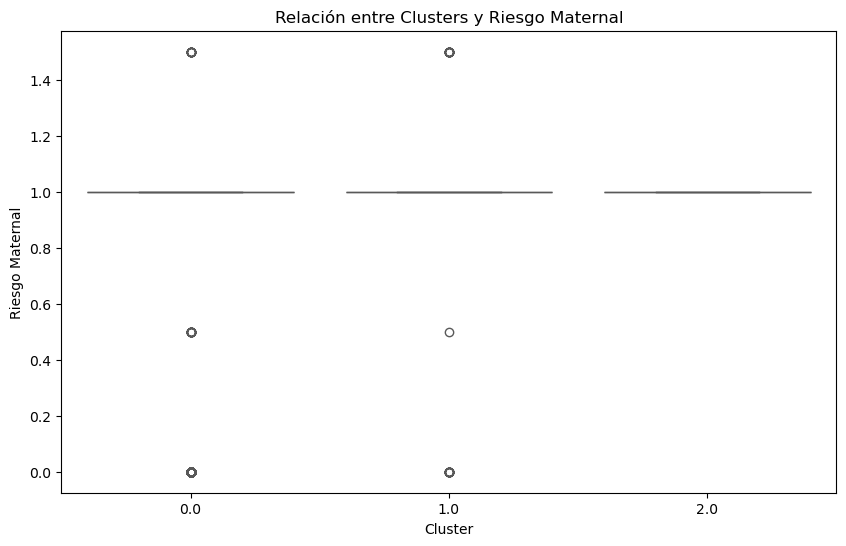

In [298]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar los 10 clusters más importantes basados en frecuencia o métricas relevantes
top_clusters = summary_clusters['Wearable_Maternal'].value_counts().head(10).index
filtered_data = summary_clusters[summary_clusters['Wearable_Maternal'].isin(top_clusters)]

# Graficar relación entre clusters y riesgo
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_data, x='Wearable_Maternal', y='Maternal_Risk', palette='Set2')
plt.title('Relación entre los 10 Clusters Principales y el Riesgo Maternal')
plt.xlabel('Cluster')
plt.ylabel('Riesgo Maternal')
plt.xticks(rotation=45)  # Girar etiquetas para mayor claridad si hay muchos clusters
plt.show()